# 3.3 간단한 과일 분류 문제 비틀기(이미지 분류 기초 문제)

- 작성자: [김찬란](https://github.com/seriousran)

In [1]:
# 코드 3-56 이미지 분류를 위한 임포트 및 구글 드라이브 마운트

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.3.1 컨볼루션과 Conv2D 레이어

In [2]:
# 코드 3-57 Conv2D 레이어

Conv2D(64, (3, 3), padding='same', activation='relu')

## 3.3.2 Pooling, DropOut, Flatten 레이어

In [3]:
# 코드 3-58 MaxPooling2D 레이어

MaxPooling2D((2,2))

In [4]:
# 코드 3-59 Dropout 레이어

Dropout(0.25)

In [5]:
# 코드 3-60 Flatten 레이어

Flatten()

## 3.3.3 Dataset Generator

In [6]:
# 코드 3-61 셀에서 실행하는 ls 명령어

!ls "/content/drive/My Drive/dataset/fruit_1"

'Apple Braeburn'   Banana


In [0]:
# 코드 3-62 이미지 데이터 생성기

train_datagen = ImageDataGenerator( 
    rescale=1./255,
    validation_split=0.2
) 

In [8]:
# 코드 3-63 디렉토리로부터 데이터 가져오는 생성기

train_generator = train_datagen.flow_from_directory( 
    "/content/drive/My Drive/dataset/fruit_1",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory( 
    "/content/drive/My Drive/dataset/fruit_1",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 786 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [9]:
# 코드 3-64 one-hot 인코딩

from keras.utils import to_categorical
import numpy as np
data = np.array([0,1,2,1,0])
print(data)

encoded = to_categorical(data)
print(encoded)

[0 1 2 1 0]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [10]:
# 코드 3-65 one-hot 디코딩

inverted = []
for en in encoded:
  inverted.append(np.argmax(en))
print(inverted)

[0, 1, 2, 1, 0]


# 3.3.4. 기초 분류 모델

In [0]:
# 코드 3-66 이미지 분류 모델 생성 함수

def create_model():
    inputs = Input(shape=(64, 64, 3))
    
    conv_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    pool_1 = MaxPooling2D((2,2))(conv_1)
    conv_2 = Conv2D(32, (3, 3), padding='same', activation='relu')(pool_1)
    pool_2 = MaxPooling2D((2,2))(conv_2)
    drop_2 = Dropout(0.25)(pool_2)
    flat_1 = Flatten()(drop_2)
    fc_1 = Dense(16)(flat_1)
    
    outputs = Dense(2, activation='softmax')(fc_1)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [12]:
# 코드 3-67 모델 생성 및 컴파일

_model_1 = create_model()
_model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
_model_1.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
____

In [13]:
# 코드 3-68 생성기를 이용한 학습

history = _model_1.fit_generator(
    train_generator,
    epochs=5,
    steps_per_epoch=72,
    validation_data=validation_generator,
    validation_steps=72)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





72/72 [==============================] - 389s 5s/step - loss: 0.0194 - acc: 0.9902 - val_loss: 5.5738e-07 - val_acc: 1.0000
Epoch 2/5
72/72 [==============================] - 6s 82ms/step - loss: 1.1924e-07 - acc: 1.0000 - val_loss: 5.0249e-07 - val_acc: 1.0000
Epoch 3/5
72/72 [==============================] - 6s 83ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 5.1433e-07 - val_acc: 1.0000
Epoch 4/5
72/72 [==============================] - 6s 80ms/step - loss: 1.1949e-07 - acc: 1.0000 - val_loss: 5.1650e-07 - val_acc: 1.0000
Epoch 5/5
72/72 [==============================] - 6s 78ms/step - loss: 1.1957e-07 - acc: 1.0000 - val_loss: 5.1577e-07 - val_acc: 1.0000


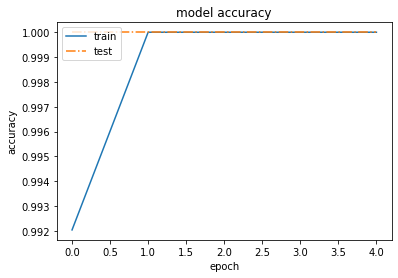

In [14]:
# 코드 3-69 학습 히스토리 정확도 그래프 그리기

plt.plot(history.history['acc'], '-') 
plt.plot(history.history['val_acc'], "-.")  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## 3.3.5 사과, 바나나, 그런데 레몬?

In [15]:
# 코드 3-70 시험을 위한 생성기

test_generator = train_datagen.flow_from_directory( 
    "/content/drive/My Drive/dataset/fruit_2/",
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 492 images belonging to 1 classes.


In [16]:
# 코드 3-71 학습한 모델과 생성기를 이용한 예측

probs = _model_1.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [17]:
# 코드 3-72 최대 예측값의 위치값을 활용하여 예측 결과 획득

pred = np.argmax(probs, axis=1)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


## 3.3.6 학습, 검증, 그리고 시험

In [0]:
# 코드 7-73 이른 종결

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)

## 3.3.7 모델 저장하고 불러오기

In [0]:
# 코드 7-74 모델 저장하기

_model_1.save("model.h5")

In [20]:
# 코드 7-75 모델 불러오기

from keras.models import load_model

_model_2 = load_model('model.h5')
_model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0   